### Regression - Price Predict ###

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
X_test = load_dataset('test.csv')
X_train = load_dataset('train.csv')
y_test = load_dataset('y_test.csv')
y_train = load_dataset('y_train.csv')

X_train = X_train[:-1]
X_test = X_test[:-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(10497, 16)
(10497, 1)
(4499, 16)
(4499, 1)


In [2]:
#agrupem i visualitzem les dades test
test=X_test.assign(Price=y_test)
test.head()
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,2.849,1.107,1.399,2.937,1.486,3.426,52.365,4.889,2.820,18.010,2.993,0.843,0.157,0.778,0.217,0.006,130.806
std,1.230,0.299,0.826,8.796,0.905,11.313,0.016,0.035,5.115,34.887,1.590,0.364,0.364,0.416,0.412,0.074,63.967
min,1.000,0.000,0.000,1.000,1.000,0.000,52.291,4.775,1.000,0.000,0.213,0.000,0.000,0.000,0.000,0.000,23.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.864,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.887,2.000,7.000,2.854,1.000,0.000,1.000,0.000,0.000,117.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,16.000,4.000,10.000,91.000,16.000,106.000,52.425,5.028,180.000,408.000,11.593,1.000,1.000,1.000,1.000,1.000,433.000


In [19]:
#agrupem i visualitzem les dades train
train=X_train.assign(Price=y_train)
train.head()
#train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.000,2.000,1,1,1.000,52.358,4.934,2,8,3.279,1,0,1,0,0,120.000
1,4,1.000,2.000,1,2,1.000,52.364,4.983,3,0,5.952,1,0,1,0,0,99.000
2,2,1.000,1.000,1,1,1.000,52.375,4.862,3,8,2.601,1,0,1,0,0,100.000
3,2,1.000,1.000,1,1,1.000,52.387,4.890,2,41,1.095,1,0,0,1,0,175.000
4,2,1.000,1.000,1,1,1.000,52.384,4.890,3,0,0.844,1,0,1,0,0,119.000


In [4]:
# mirem si hi ha valors nulls
train.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [5]:
# mirem que no té cap null
train.notnull().sum()

accommodates                      10497
bathrooms                         10497
bedrooms                          10497
calculated_host_listings_count    10497
guests_included                   10497
host_listings_count               10497
latitude                          10497
longitude                         10497
minimum_nights                    10497
number_of_reviews                 10497
d_centre                          10497
instant_bookable_f                10497
instant_bookable_t                10497
room_type_Entire home/apt         10497
room_type_Private room            10497
room_type_Shared room             10497
Price                             10497
dtype: int64

In [6]:
# mirem si te NaN's
train.isna().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [7]:
# mirem la correlació de les dades amb el preu
train.corr()['Price']

accommodates                     -0.002
bathrooms                         0.002
bedrooms                         -0.005
calculated_host_listings_count   -0.002
guests_included                   0.012
host_listings_count              -0.004
latitude                          0.010
longitude                         0.015
minimum_nights                   -0.005
number_of_reviews                 0.003
d_centre                         -0.014
instant_bookable_f               -0.003
instant_bookable_t                0.003
room_type_Entire home/apt         0.003
room_type_Private room           -0.000
room_type_Shared room            -0.019
Price                             1.000
Name: Price, dtype: float64

In [8]:
corr = train.corr()
priceCorr = corr.Price.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 Price                1.000
longitude            0.015
guests_included      0.012
latitude             0.010
instant_bookable_t   0.003
Name: Price, dtype: float64 

Most Negative Correlations
 host_listings_count     -0.004
bedrooms                -0.005
minimum_nights          -0.005
d_centre                -0.014
room_type_Shared room   -0.019
Name: Price, dtype: float64


<IPython.core.display.Javascript object>


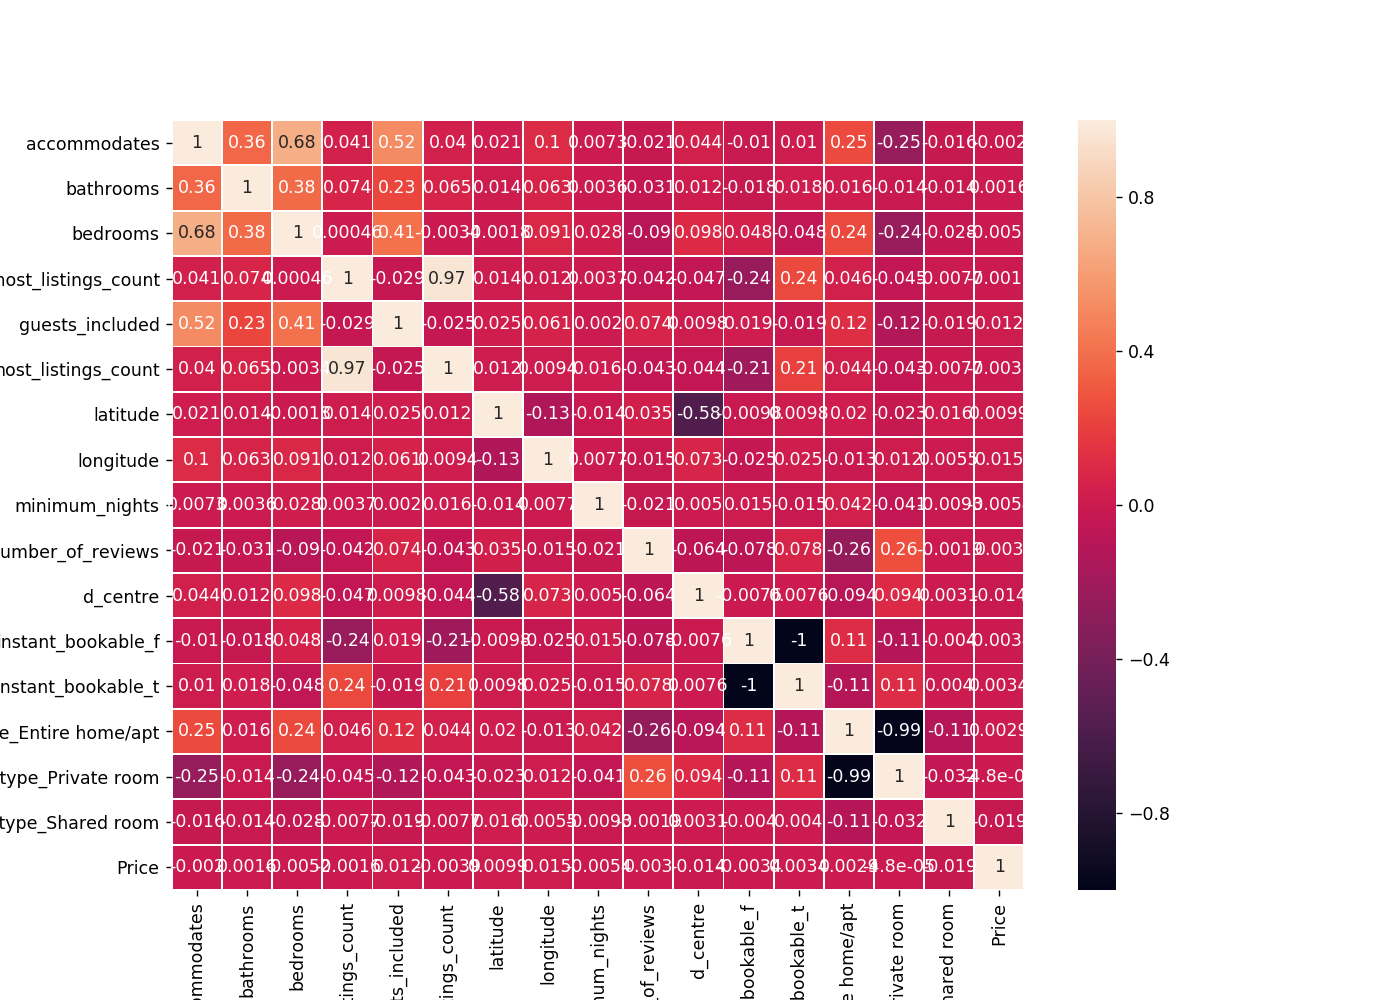

In [17]:
import seaborn as sns

#Mirem la correlació entre els atributs d'entrada per entendre millor les dades
#train_binary=train
#train_binary.head()
    
correlacio = train.corr()

plt.figure(figsize=(11,8))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


In [10]:
#relacio = sns.pairplot(train)

Primer fem la predicció amb les dades no normalitzades

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt

In [22]:
#split by the most correlated features
X_Correlated_train =pd.DataFrame(X_train, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])
X_Correlated_test =pd.DataFrame(X_test, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])

print("shape correlated train: ", X_Correlated_train.shape)
print("shape correlated test: ", X_Correlated_test.shape)

X_Most_Correlated_train =pd.DataFrame(X_train, columns=['room_type_Shared room'])
X_Most_Correlated_test =pd.DataFrame(X_test, columns=['room_type_Shared room'])


shape correlated train:  (10497, 5)
shape correlated test:  (4499, 5)


1. Linear Regression multiple amb totes les dades, les que més correlacionen i la que més correlaciona.

Error mitjà d'entrenament:  4059.9299955221477
Error mitjà de test:  4102.732010893084
R2 d'entrenament:  0.0012167583713048602
R2 de test:  -0.00290616487744777


<IPython.core.display.Javascript object>


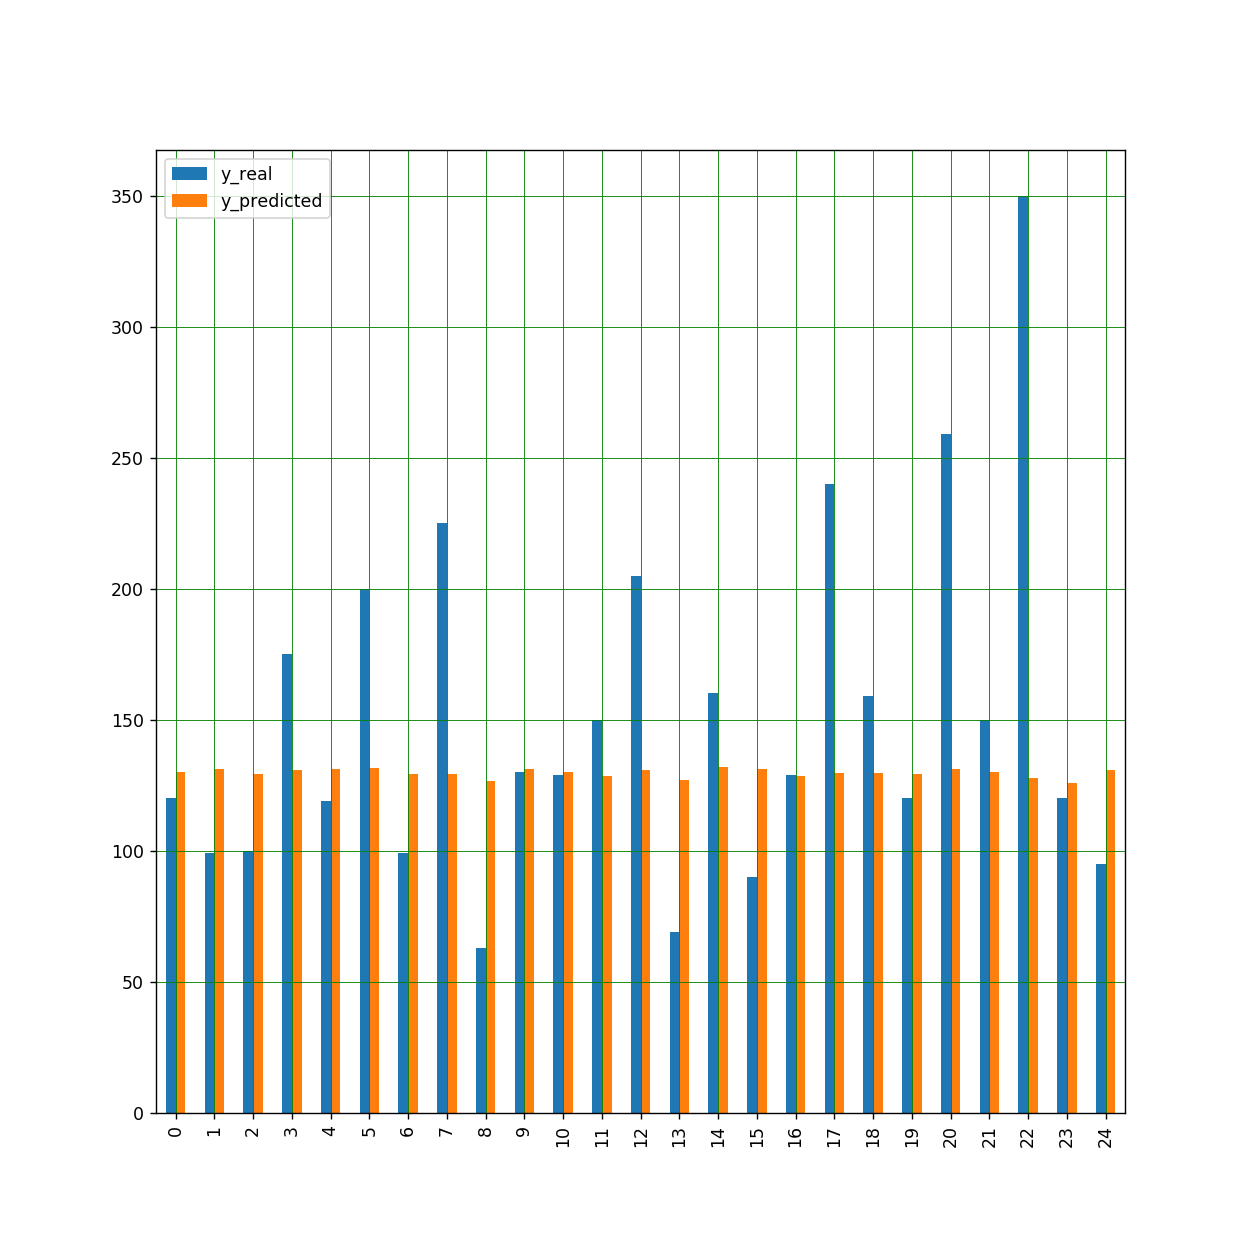

In [51]:
# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)


print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})
df
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Error mitjà d'entrenament:  4061.0384570514393
Error mitjà de test:  4097.2402595991525
R2 d'entrenament:  0.0009440657877708425
R2 de test:  -0.0015637152087795148


<IPython.core.display.Javascript object>


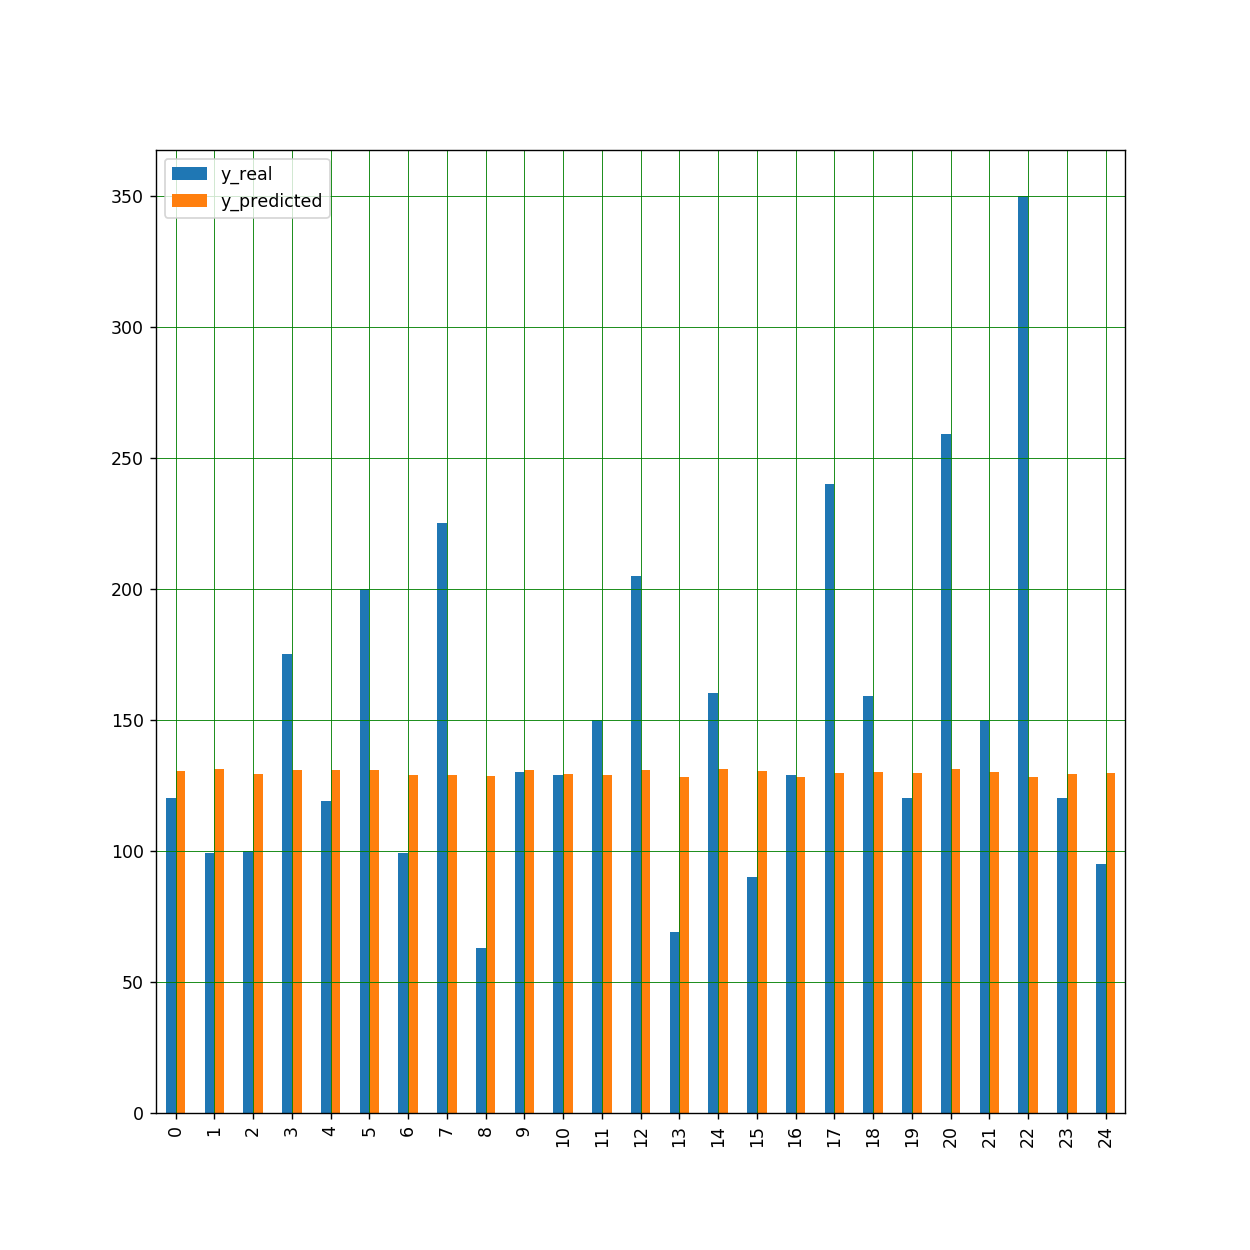

In [52]:
# Linear regression with the most correlated features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Correlated_train, y_train)

y_train_predicted = linear_regression.predict(X_Correlated_train)
y_test_predicted = linear_regression.predict(X_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)


print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


<IPython.core.display.Javascript object>


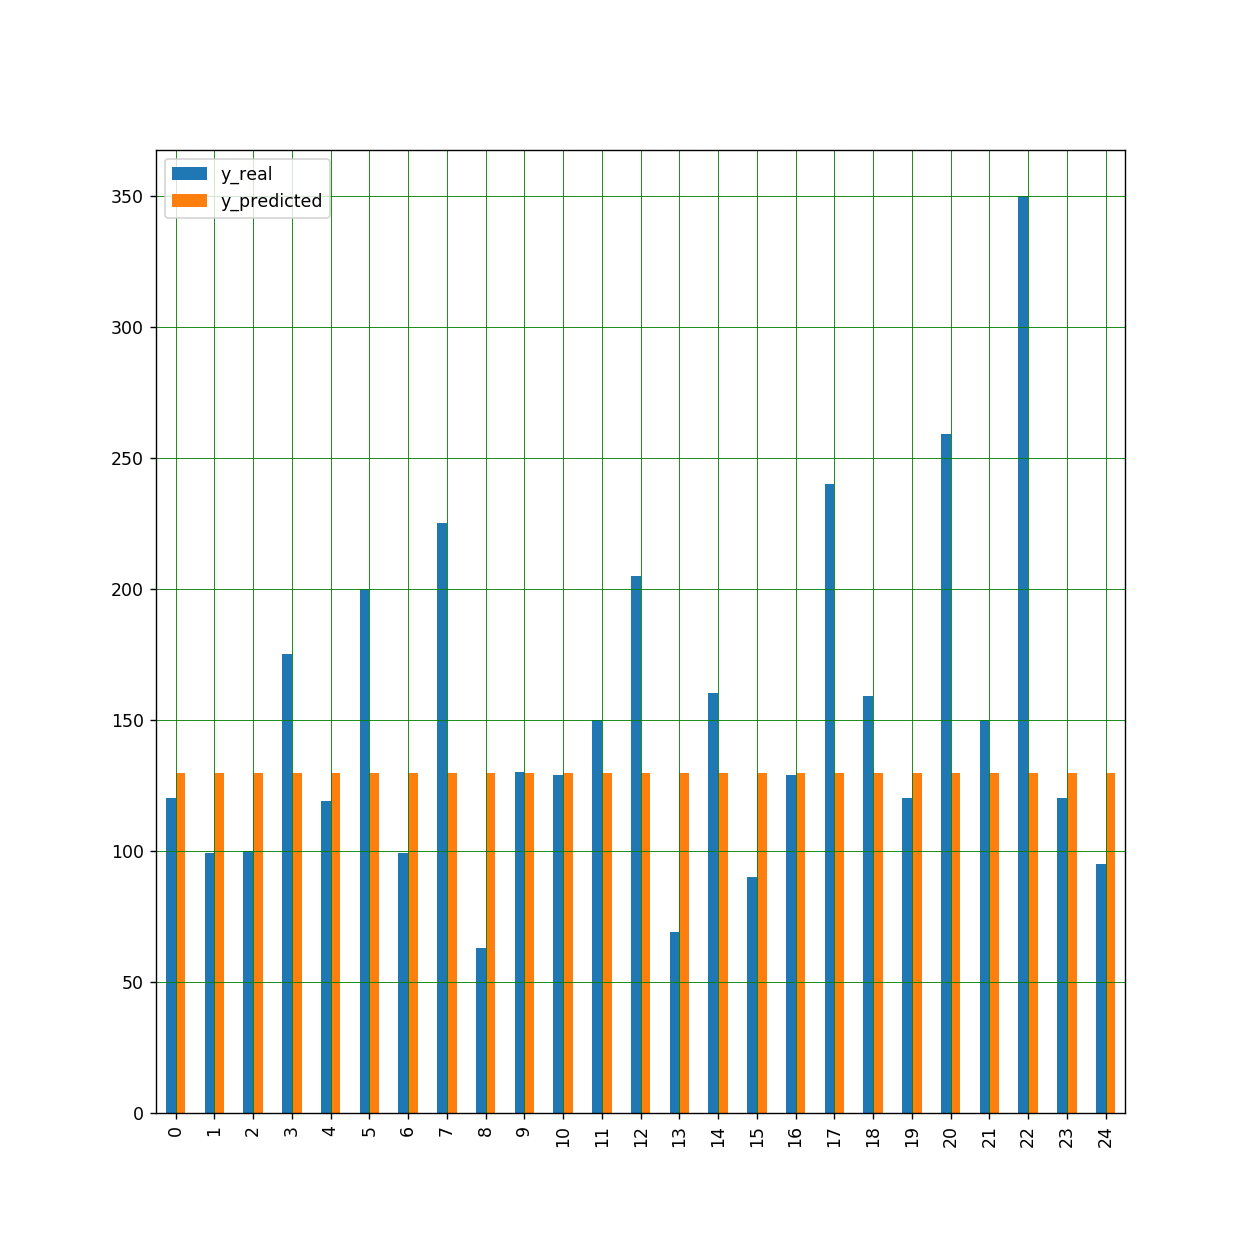

In [53]:
# Linear regression with the most correlated feature

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Most_Correlated_train, y_train)

y_train_predicted = linear_regression.predict(X_Most_Correlated_train)
y_test_predicted = linear_regression.predict(X_Most_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


df = y_train.assign(y_predicted=y_train_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2. Multifeature polinomial regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [56]:
#Multi-featrues polinomial regression with all the featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4027.3645544316505
Error mitjà de test:  4133.444351551199
R2 d'entrenament:  0.00922818143852755
R2 de test:  -0.010413746582043304


In [47]:
#print("x poly shape: ", X_poly.shape)

In [57]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Correlated_train)
X_poly_test = poly.fit_transform(X_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)



Error mitjà d'entrenament:  4058.0030998577786
Error mitjà de test:  4105.4640064505975
R2 d'entrenament:  0.0016907939088786073
R2 de test:  -0.0035739967464980538


In [58]:
#Multi-featrues polinomial regression with the most correlated featrue
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Most_Correlated_train)
X_poly_test = poly.fit_transform(X_Most_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


El resultat obtingut és amb polinomis de grau 2, i veiem que és pitjor que amb un regressor lineal. I si augmentem els graus pitjor és el resultat fins al punt que no es pot calcular (grau 4)

3. KNN regressor

In [69]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_test=[]
accuracy_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test, test_predicted))
    train_MSD.append(mean_squared_error(y_train, train_predicted))
    #accuracy_train.append(KNN.score(X_train, y_train))
    #accuracy_test.append(KNN.score(X_test, y_test))
   # print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD[i-1])
    #print("Error mitjà de test per", i ,"veins: ", test_MSD[i-1])
  #  print("Accuracy d'entrenament per",i,"veins:",accuracy_train[i-1])
 #   print("Accuracy de test per",i,"veins:",accuracy_test[i-1])

<IPython.core.display.Javascript object>


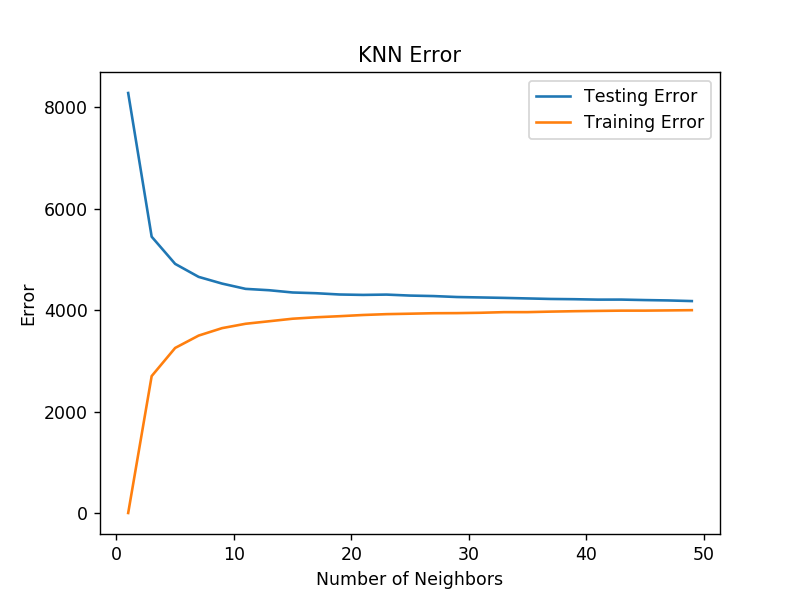

In [70]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  853.7075745451082
Error mitjà de test:  4809.658430762392
R2 d'entrenament:  0.7899794283035483
R2 de test:  -0.17571317803825615


<IPython.core.display.Javascript object>


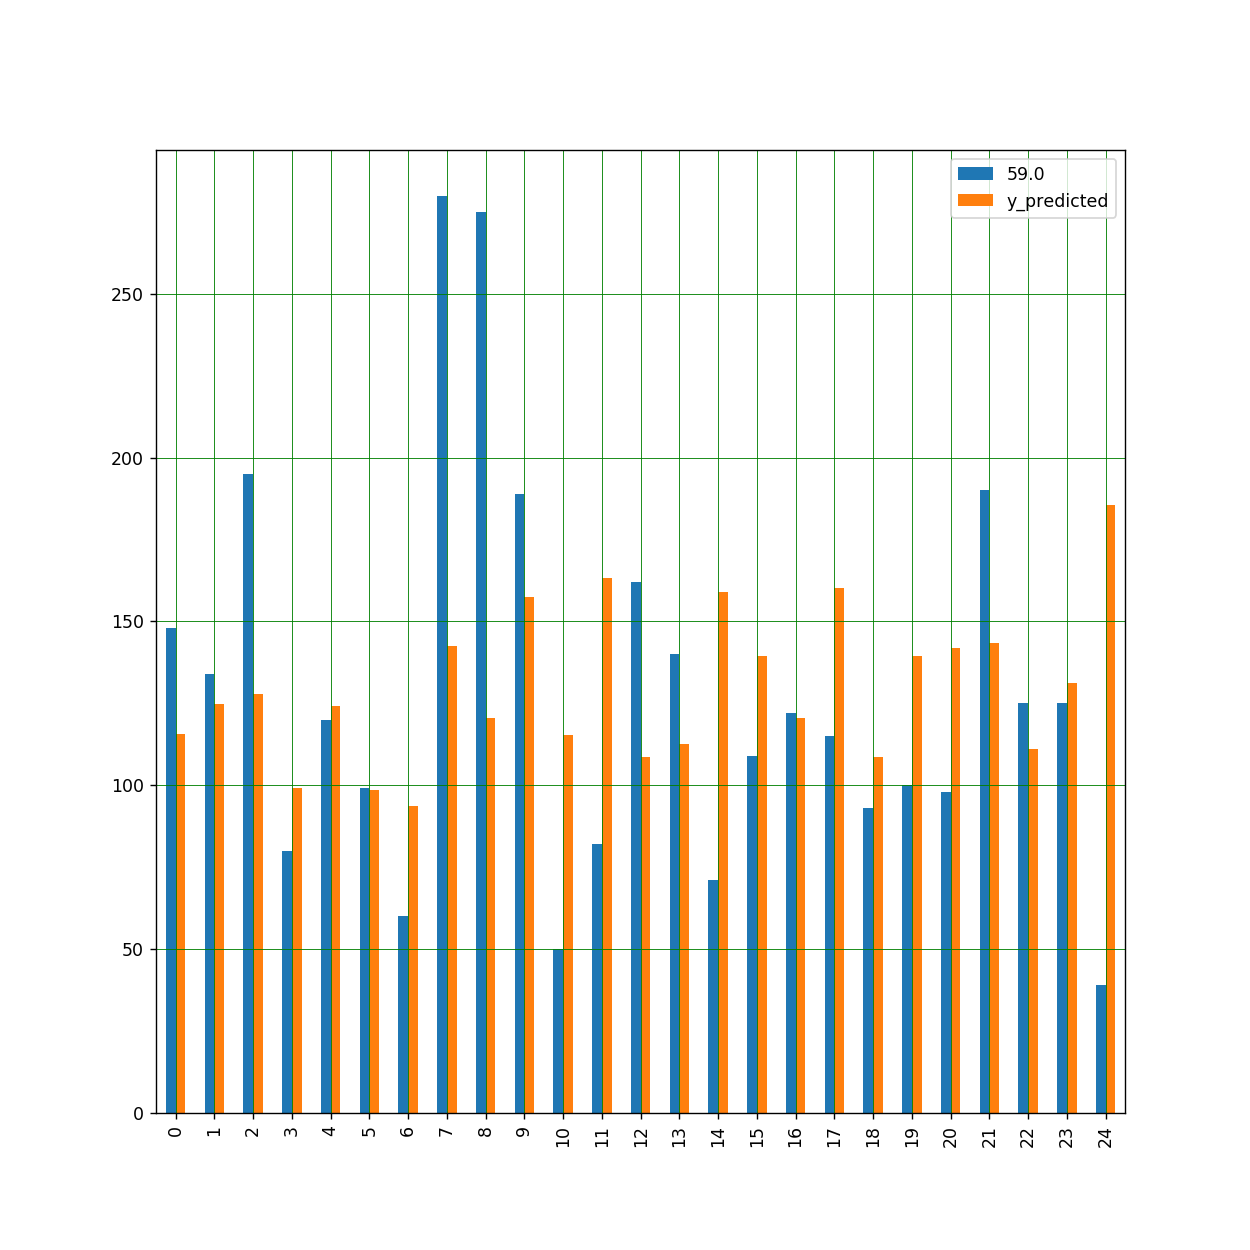

In [62]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


df = y_test.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



In [32]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test,label=y_test)

In [37]:
#build model
cat_model = CatBoostRegressor(loss_function="RMSE")
# Fit model 
cat_model.fit( X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073655
0:	learn: 63.7492433	test: 63.9698920	best: 63.9698920 (0)	total: 7.26ms	remaining: 7.25s
1:	learn: 63.7307246	test: 63.9722477	best: 63.9698920 (0)	total: 14.2ms	remaining: 7.1s
2:	learn: 63.7219178	test: 63.9758565	best: 63.9698920 (0)	total: 20.4ms	remaining: 6.79s
3:	learn: 63.7015739	test: 63.9825380	best: 63.9698920 (0)	total: 27.2ms	remaining: 6.76s
4:	learn: 63.6856043	test: 63.9817930	best: 63.9698920 (0)	total: 33.7ms	remaining: 6.71s
5:	learn: 63.6572484	test: 63.9963120	best: 63.9698920 (0)	total: 40.7ms	remaining: 6.75s
6:	learn: 63.6460991	test: 63.9937296	best: 63.9698920 (0)	total: 46.7ms	remaining: 6.62s
7:	learn: 63.6274510	test: 63.9979360	best: 63.9698920 (0)	total: 53.6ms	remaining: 6.64s
8:	learn: 63.5988391	test: 63.9960505	best: 63.9698920 (0)	total: 60.3ms	remaining: 6.63s
9:	learn: 63.5907632	test: 63.9953751	best: 63.9698920 (0)	total: 66.7ms	remaining: 6.6s
10:	learn: 63.5825600	test: 63.9956602	best: 63.9698920 (0)	total: 73.3m

109:	learn: 62.5220857	test: 64.1043630	best: 63.9698920 (0)	total: 691ms	remaining: 5.59s
110:	learn: 62.5145191	test: 64.1090101	best: 63.9698920 (0)	total: 698ms	remaining: 5.59s
111:	learn: 62.5013485	test: 64.1112395	best: 63.9698920 (0)	total: 705ms	remaining: 5.59s
112:	learn: 62.4952842	test: 64.1158348	best: 63.9698920 (0)	total: 711ms	remaining: 5.58s
113:	learn: 62.4815634	test: 64.1162324	best: 63.9698920 (0)	total: 719ms	remaining: 5.59s
114:	learn: 62.4716595	test: 64.1208827	best: 63.9698920 (0)	total: 726ms	remaining: 5.59s
115:	learn: 62.4588795	test: 64.1283437	best: 63.9698920 (0)	total: 733ms	remaining: 5.59s
116:	learn: 62.4481531	test: 64.1312343	best: 63.9698920 (0)	total: 740ms	remaining: 5.58s
117:	learn: 62.4403829	test: 64.1306298	best: 63.9698920 (0)	total: 748ms	remaining: 5.59s
118:	learn: 62.4309214	test: 64.1290907	best: 63.9698920 (0)	total: 755ms	remaining: 5.59s
119:	learn: 62.4197286	test: 64.1337189	best: 63.9698920 (0)	total: 762ms	remaining: 5.59s

219:	learn: 61.0651235	test: 64.2943750	best: 63.9698920 (0)	total: 1.35s	remaining: 4.8s
220:	learn: 61.0533864	test: 64.2940791	best: 63.9698920 (0)	total: 1.36s	remaining: 4.79s
221:	learn: 61.0357682	test: 64.3083911	best: 63.9698920 (0)	total: 1.36s	remaining: 4.78s
222:	learn: 61.0170101	test: 64.3051859	best: 63.9698920 (0)	total: 1.37s	remaining: 4.76s
223:	learn: 61.0051926	test: 64.3098644	best: 63.9698920 (0)	total: 1.37s	remaining: 4.75s
224:	learn: 60.9908694	test: 64.3078756	best: 63.9698920 (0)	total: 1.38s	remaining: 4.74s
225:	learn: 60.9755266	test: 64.3027746	best: 63.9698920 (0)	total: 1.38s	remaining: 4.73s
226:	learn: 60.9628242	test: 64.3030158	best: 63.9698920 (0)	total: 1.39s	remaining: 4.72s
227:	learn: 60.9429250	test: 64.3109436	best: 63.9698920 (0)	total: 1.39s	remaining: 4.71s
228:	learn: 60.9288189	test: 64.3123072	best: 63.9698920 (0)	total: 1.4s	remaining: 4.71s
229:	learn: 60.9285263	test: 64.3121142	best: 63.9698920 (0)	total: 1.41s	remaining: 4.71s
2

327:	learn: 59.7338297	test: 64.4460322	best: 63.9698920 (0)	total: 2.03s	remaining: 4.16s
328:	learn: 59.7243483	test: 64.4412917	best: 63.9698920 (0)	total: 2.04s	remaining: 4.16s
329:	learn: 59.7070740	test: 64.4394686	best: 63.9698920 (0)	total: 2.04s	remaining: 4.15s
330:	learn: 59.6899536	test: 64.4409584	best: 63.9698920 (0)	total: 2.05s	remaining: 4.14s
331:	learn: 59.6783339	test: 64.4392371	best: 63.9698920 (0)	total: 2.06s	remaining: 4.14s
332:	learn: 59.6643414	test: 64.4468973	best: 63.9698920 (0)	total: 2.06s	remaining: 4.13s
333:	learn: 59.6596719	test: 64.4424100	best: 63.9698920 (0)	total: 2.07s	remaining: 4.13s
334:	learn: 59.6578965	test: 64.4433939	best: 63.9698920 (0)	total: 2.08s	remaining: 4.12s
335:	learn: 59.6380070	test: 64.4439490	best: 63.9698920 (0)	total: 2.08s	remaining: 4.12s
336:	learn: 59.6248484	test: 64.4423812	best: 63.9698920 (0)	total: 2.09s	remaining: 4.11s
337:	learn: 59.6112079	test: 64.4445851	best: 63.9698920 (0)	total: 2.1s	remaining: 4.11s


433:	learn: 58.6020082	test: 64.6216557	best: 63.9698920 (0)	total: 2.7s	remaining: 3.52s
434:	learn: 58.5953793	test: 64.6221030	best: 63.9698920 (0)	total: 2.7s	remaining: 3.51s
435:	learn: 58.5851103	test: 64.6244765	best: 63.9698920 (0)	total: 2.71s	remaining: 3.5s
436:	learn: 58.5716011	test: 64.6255399	best: 63.9698920 (0)	total: 2.74s	remaining: 3.53s
437:	learn: 58.5531277	test: 64.6304432	best: 63.9698920 (0)	total: 2.75s	remaining: 3.52s
438:	learn: 58.5394109	test: 64.6296562	best: 63.9698920 (0)	total: 2.75s	remaining: 3.52s
439:	learn: 58.5391946	test: 64.6297104	best: 63.9698920 (0)	total: 2.75s	remaining: 3.51s
440:	learn: 58.5277912	test: 64.6291674	best: 63.9698920 (0)	total: 2.76s	remaining: 3.5s
441:	learn: 58.5134541	test: 64.6283516	best: 63.9698920 (0)	total: 2.77s	remaining: 3.49s
442:	learn: 58.5085981	test: 64.6288388	best: 63.9698920 (0)	total: 2.77s	remaining: 3.48s
443:	learn: 58.4939735	test: 64.6338802	best: 63.9698920 (0)	total: 2.78s	remaining: 3.48s
444

547:	learn: 57.4958429	test: 64.7991081	best: 63.9698920 (0)	total: 3.39s	remaining: 2.8s
548:	learn: 57.4957385	test: 64.7991088	best: 63.9698920 (0)	total: 3.4s	remaining: 2.79s
549:	learn: 57.4802287	test: 64.8011870	best: 63.9698920 (0)	total: 3.4s	remaining: 2.78s
550:	learn: 57.4599616	test: 64.8079545	best: 63.9698920 (0)	total: 3.41s	remaining: 2.78s
551:	learn: 57.4507924	test: 64.8106026	best: 63.9698920 (0)	total: 3.42s	remaining: 2.77s
552:	learn: 57.4359414	test: 64.8097811	best: 63.9698920 (0)	total: 3.42s	remaining: 2.77s
553:	learn: 57.4207962	test: 64.8146197	best: 63.9698920 (0)	total: 3.43s	remaining: 2.76s
554:	learn: 57.4058401	test: 64.8122718	best: 63.9698920 (0)	total: 3.44s	remaining: 2.76s
555:	learn: 57.4056641	test: 64.8123098	best: 63.9698920 (0)	total: 3.44s	remaining: 2.75s
556:	learn: 57.3946687	test: 64.8165792	best: 63.9698920 (0)	total: 3.45s	remaining: 2.74s
557:	learn: 57.3820296	test: 64.8213785	best: 63.9698920 (0)	total: 3.46s	remaining: 2.74s
55

675:	learn: 56.4166004	test: 64.9956654	best: 63.9698920 (0)	total: 4.5s	remaining: 2.15s
676:	learn: 56.4050817	test: 64.9951134	best: 63.9698920 (0)	total: 4.5s	remaining: 2.15s
677:	learn: 56.4013427	test: 64.9969301	best: 63.9698920 (0)	total: 4.5s	remaining: 2.14s
678:	learn: 56.3939664	test: 64.9994210	best: 63.9698920 (0)	total: 4.51s	remaining: 2.13s
679:	learn: 56.3797704	test: 65.0007399	best: 63.9698920 (0)	total: 4.51s	remaining: 2.12s
680:	learn: 56.3662594	test: 64.9989149	best: 63.9698920 (0)	total: 4.52s	remaining: 2.12s
681:	learn: 56.3556586	test: 65.0011842	best: 63.9698920 (0)	total: 4.52s	remaining: 2.11s
682:	learn: 56.3479163	test: 64.9974838	best: 63.9698920 (0)	total: 4.53s	remaining: 2.1s
683:	learn: 56.3402577	test: 64.9955212	best: 63.9698920 (0)	total: 4.53s	remaining: 2.09s
684:	learn: 56.3303329	test: 64.9969893	best: 63.9698920 (0)	total: 4.53s	remaining: 2.08s
685:	learn: 56.3301639	test: 64.9966114	best: 63.9698920 (0)	total: 4.54s	remaining: 2.08s
686

780:	learn: 55.5467792	test: 65.1361903	best: 63.9698920 (0)	total: 5.01s	remaining: 1.4s
781:	learn: 55.5392422	test: 65.1390577	best: 63.9698920 (0)	total: 5.02s	remaining: 1.4s
782:	learn: 55.5313793	test: 65.1399666	best: 63.9698920 (0)	total: 5.02s	remaining: 1.39s
783:	learn: 55.5197575	test: 65.1405746	best: 63.9698920 (0)	total: 5.03s	remaining: 1.39s
784:	learn: 55.5107431	test: 65.1387600	best: 63.9698920 (0)	total: 5.04s	remaining: 1.38s
785:	learn: 55.5019023	test: 65.1404383	best: 63.9698920 (0)	total: 5.04s	remaining: 1.37s
786:	learn: 55.4971274	test: 65.1422095	best: 63.9698920 (0)	total: 5.05s	remaining: 1.37s
787:	learn: 55.4949139	test: 65.1426908	best: 63.9698920 (0)	total: 5.06s	remaining: 1.36s
788:	learn: 55.4887330	test: 65.1435690	best: 63.9698920 (0)	total: 5.06s	remaining: 1.35s
789:	learn: 55.4864428	test: 65.1435458	best: 63.9698920 (0)	total: 5.07s	remaining: 1.35s
790:	learn: 55.4804701	test: 65.1426984	best: 63.9698920 (0)	total: 5.08s	remaining: 1.34s
7

891:	learn: 54.6901938	test: 65.2640321	best: 63.9698920 (0)	total: 5.68s	remaining: 688ms
892:	learn: 54.6877951	test: 65.2659824	best: 63.9698920 (0)	total: 5.68s	remaining: 681ms
893:	learn: 54.6795016	test: 65.2730488	best: 63.9698920 (0)	total: 5.69s	remaining: 674ms
894:	learn: 54.6697855	test: 65.2790128	best: 63.9698920 (0)	total: 5.69s	remaining: 668ms
895:	learn: 54.6617052	test: 65.2754569	best: 63.9698920 (0)	total: 5.7s	remaining: 661ms
896:	learn: 54.6552654	test: 65.2769110	best: 63.9698920 (0)	total: 5.7s	remaining: 655ms
897:	learn: 54.6491405	test: 65.2784597	best: 63.9698920 (0)	total: 5.71s	remaining: 648ms
898:	learn: 54.6410821	test: 65.2809251	best: 63.9698920 (0)	total: 5.71s	remaining: 642ms
899:	learn: 54.6374008	test: 65.2803770	best: 63.9698920 (0)	total: 5.71s	remaining: 635ms
900:	learn: 54.6289228	test: 65.2791870	best: 63.9698920 (0)	total: 5.72s	remaining: 629ms
901:	learn: 54.6202774	test: 65.2800804	best: 63.9698920 (0)	total: 5.73s	remaining: 622ms
9

987:	learn: 53.9368893	test: 65.3621705	best: 63.9698920 (0)	total: 6.43s	remaining: 78.1ms
988:	learn: 53.9325367	test: 65.3642981	best: 63.9698920 (0)	total: 6.44s	remaining: 71.6ms
989:	learn: 53.9214512	test: 65.3628186	best: 63.9698920 (0)	total: 6.45s	remaining: 65.1ms
990:	learn: 53.9161232	test: 65.3630347	best: 63.9698920 (0)	total: 6.45s	remaining: 58.6ms
991:	learn: 53.9127195	test: 65.3636495	best: 63.9698920 (0)	total: 6.46s	remaining: 52.1ms
992:	learn: 53.9009400	test: 65.3695470	best: 63.9698920 (0)	total: 6.47s	remaining: 45.6ms
993:	learn: 53.8950879	test: 65.3715699	best: 63.9698920 (0)	total: 6.47s	remaining: 39.1ms
994:	learn: 53.8901890	test: 65.3734677	best: 63.9698920 (0)	total: 6.48s	remaining: 32.6ms
995:	learn: 53.8828314	test: 65.3748055	best: 63.9698920 (0)	total: 6.49s	remaining: 26.1ms
996:	learn: 53.8741357	test: 65.3779190	best: 63.9698920 (0)	total: 6.5s	remaining: 19.5ms
997:	learn: 53.8663250	test: 65.3743356	best: 63.9698920 (0)	total: 6.5s	remainin

In [39]:
from sklearn.metrics import r2_score
y_predict= cat_model.predict(X_test)
#RMSE
MSE_test = mean_squared_error(y_test,y_predict)
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
#n= X.train.shape[0] # total no of datapoints
#p= X.train.shape[1] # total no of independent features
#adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(MSE_test))
print("R2: {:.2f}".format(r2_test))
#print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 4092.15
R2: -0.00


Ara provarem els matiexos models però estandarditzant les dades per veure si hi ha algun canvi significatiu

In [36]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_train_scaled=DataFrame(X_train_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled=DataFrame(y_train_scaled, columns=["Price"])
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)
X_test_scaled=DataFrame(X_test_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled=DataFrame(y_test_scaled, columns=["Price"])

In [37]:
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X_train_scaled2 = scaler.fit_transform(X_train)
y_train_scaled2 = scaler.fit_transform(y_train)
X_train_scaled2=DataFrame(X_train_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled2=DataFrame(y_train_scaled2, columns=["Price"])
X_test_scaled2 = scaler.fit_transform(X_test)
y_test_scaled2 = scaler.fit_transform(y_test)
X_test_scaled2=DataFrame(X_test_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled2=DataFrame(y_test_scaled2, columns=["Price"])

Error mitjà d'entrenament:  0.02290626884029174
Error mitjà de test:  0.024400196074427775
R2 d'entrenament:  0.0012167583713046382
R2 de test:  -0.0026472816369289554


<IPython.core.display.Javascript object>


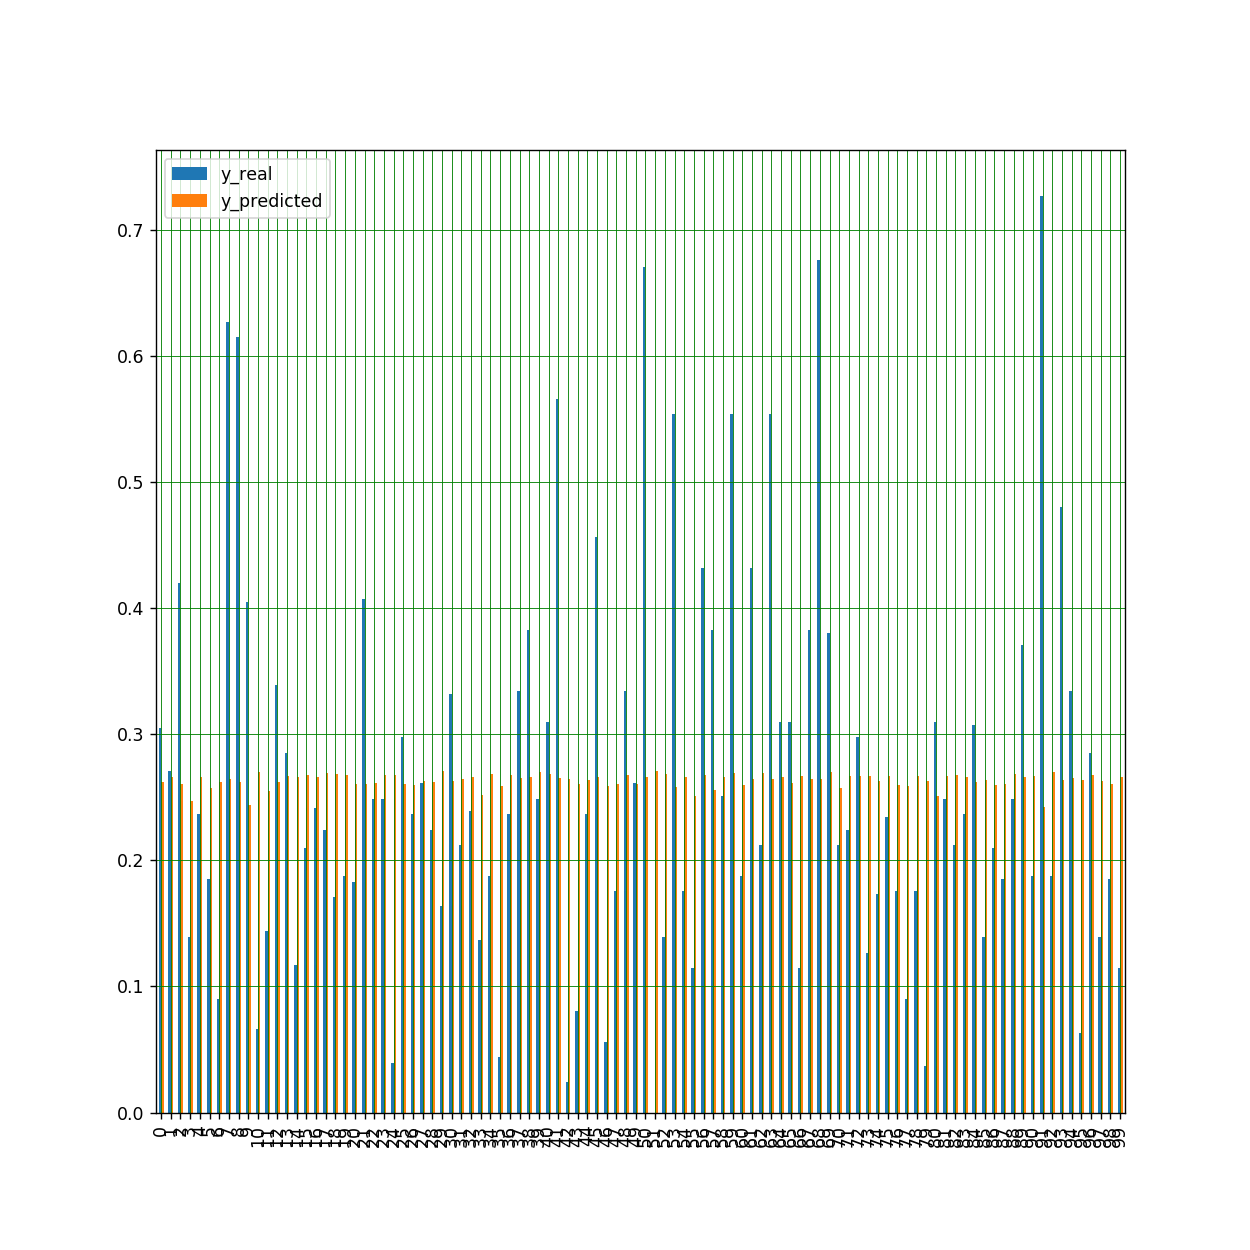

In [66]:
# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_scaled, y_train_scaled)

y_train_predicted = linear_regression.predict(X_train_scaled)
y_test_predicted = linear_regression.predict(X_test_scaled) 

train_MSD = mean_squared_error(y_train_scaled, y_train_predicted)
train_R2 = r2_score(y_train_scaled, y_train_predicted)
test_MSD = mean_squared_error(y_test_scaled, y_test_predicted)
test_R2 = r2_score(y_test_scaled, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_test_scaled.assign(y_predicted=y_test_predicted)
df = df.rename(columns={'Price' : 'y_real'})
DataFrame(df)


df1 = df.head(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [67]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.fit_transform(X_test_scaled)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train_scaled)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)

poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train_scaled, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test_scaled, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
R2 d'entrenament:  0.009228061717870384
R2 de test:  -144.93545927416585


KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor
R2_test=[]
R2_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train_scaled, y_train_scaled) 
    test_predicted = KNN.predict(X_test_scaled)
    train_predicted = KNN.predict(X_train_scaled)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    R2_test.append(r2_score(y_test_scaled, test_predicted))
    R2_train.append(r2_score(y_train_scaled, train_predicted))
    #accuracy_train.append(KNN.score(X_train, y_train))
    #accuracy_test.append(KNN.score(X_test, y_test))
   # print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD[i-1])
    #print("Error mitjà de test per", i ,"veins: ", test_MSD[i-1])
  #  print("Accuracy d'entrenament per",i,"veins:",accuracy_train[i-1])
 #   print("Accuracy de test per",i,"veins:",accuracy_test[i-1])

In [77]:
R2_train

[1.0,
 0.3328871004188114,
 0.18531673833900064,
 0.1299726523997876,
 0.09843386407519228,
 0.08550799131252096,
 0.07246946723958791,
 0.06480575088240481,
 0.06061036772028239,
 0.053813912390968555,
 0.04836226826512102,
 0.04241590979395671,
 0.04019989033342275,
 0.038085470199914484,
 0.03408302089666404,
 0.03184811522803621,
 0.030280736247619622,
 0.028831175628489802,
 0.02646665398111625,
 0.02592822875524947,
 0.024719177778186552,
 0.024083548925254106,
 0.022714567075376113,
 0.02194196703884954,
 0.02176740431599289]

<IPython.core.display.Javascript object>


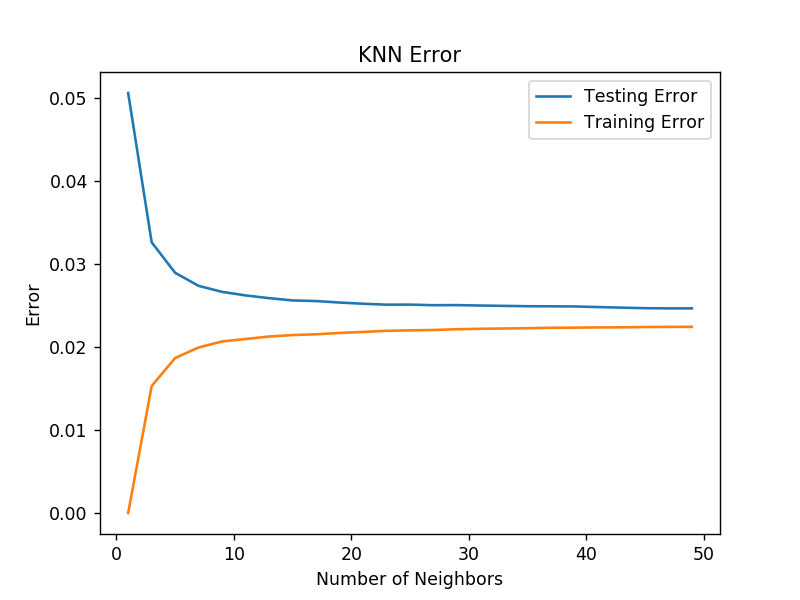

In [75]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


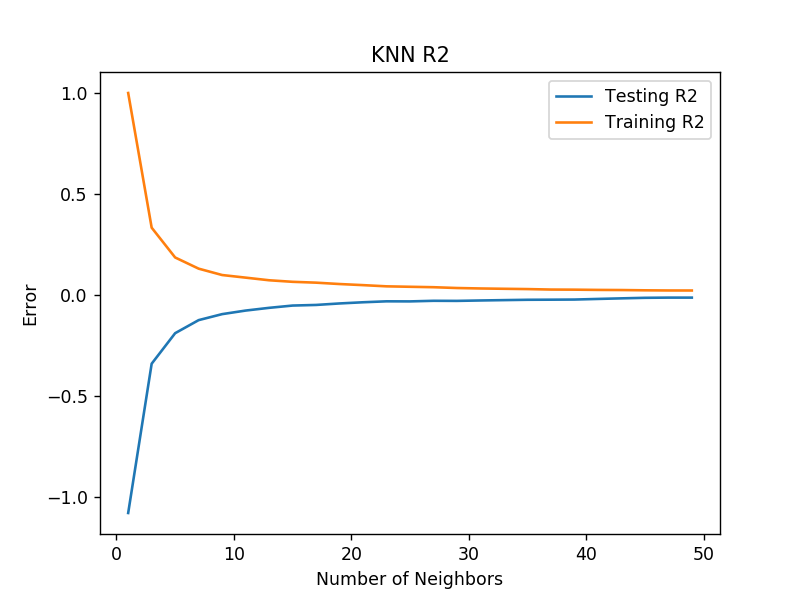

In [79]:
plt.figure()
plt.title('KNN R2')
plt.plot(num, R2_test, label = 'Testing R2')
plt.plot(num, R2_train, label = 'Training R2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random forest

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  0.004673118384963067
Error mitjà de test:  0.03208602071673048
R2 d'entrenament:  0.7962377739652592
R2 de test:  -0.31847143162477476


<IPython.core.display.Javascript object>


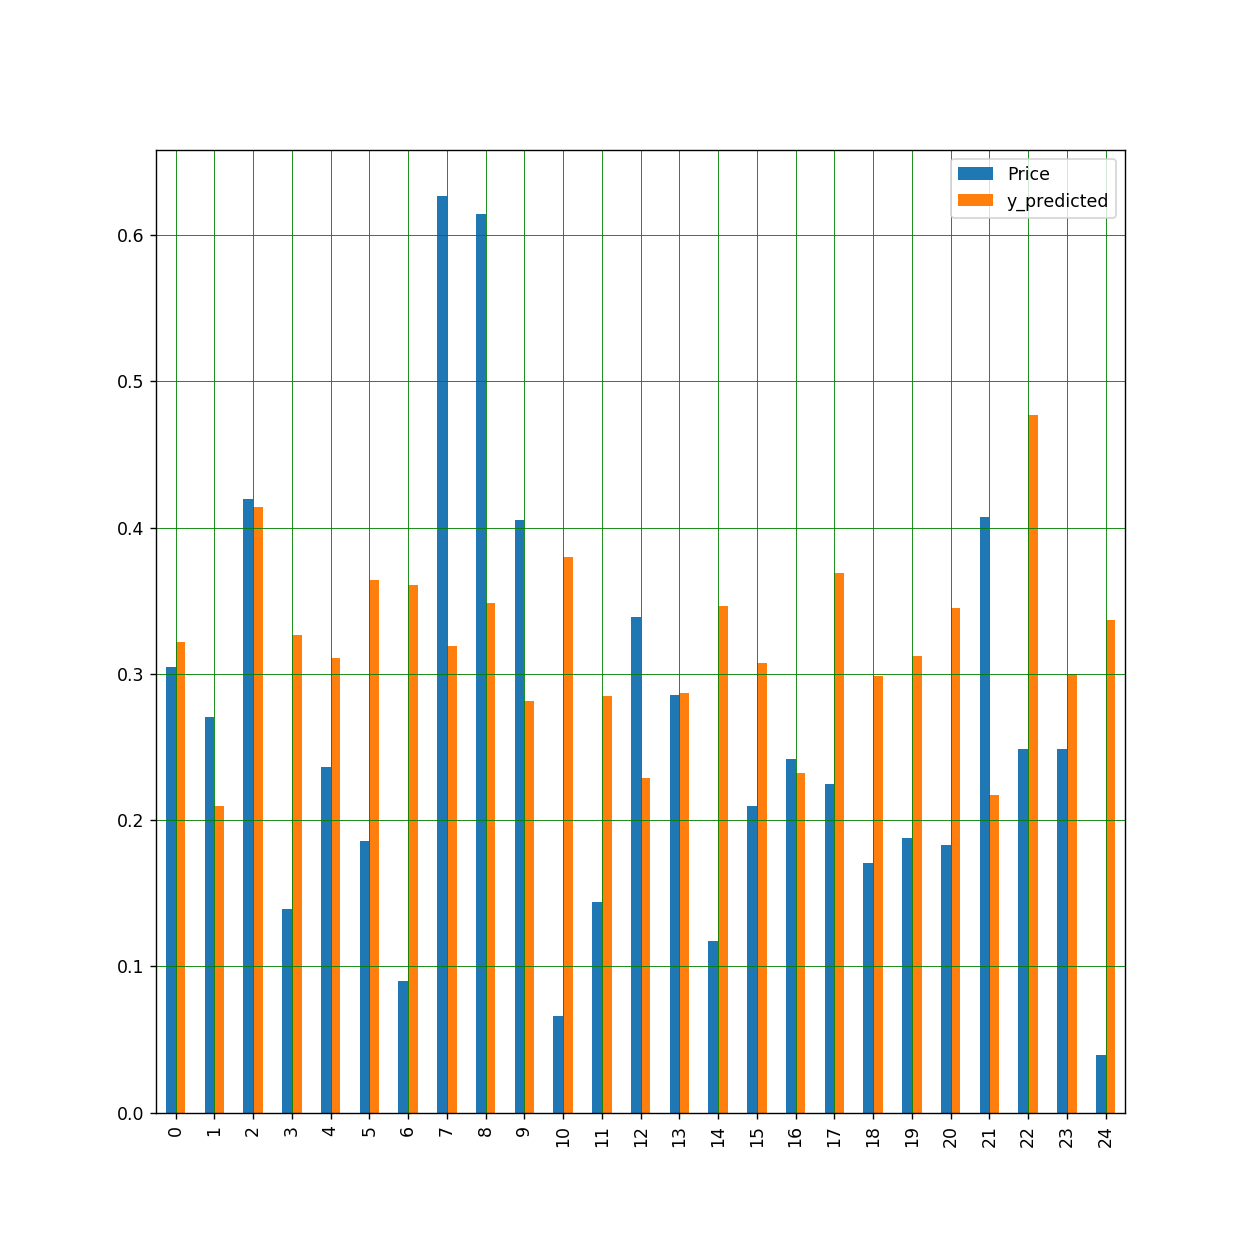

In [80]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_scaled, y_train_scaled)
test_predicted = random_forest.predict(X_test_scaled) 
train_predicted = random_forest.predict(X_train_scaled) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train_scaled, train_predicted)
train_R2 = r2_score(y_train_scaled, train_predicted)
test_MSD = mean_squared_error(y_test_scaled, test_predicted)
test_R2 = r2_score(y_test_scaled, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


df = y_test_scaled.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Models de regressió:
- Regressió Lineal
- Regressió Multilineal
- Logistic regression
- Descens del gràdient

Ensemble learning
- Random  Forest
- Decision Tree


Mirar lo dels hyperparametres

In [26]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [27]:
conda install catboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\cfrag\Anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tbb-2018.0.5               |       he980bc4_0         150 KB
    ------------------------------------------------------------
                                           Total:         150 KB

The following NEW packages will be INSTALLED:

  tbb                pkgs/main/win-64::tbb-2018.0.5-he980bc4_0




tbb-2018.0.5         | 150 KB    |            |   0% 
tbb-2018.0.5         | 150 KB    | #          |  11% 
tbb-2018.0.5         | 150 KB    | ########## | 100% 
tbb-2018.0.5         | 150 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use up


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0


In [28]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [29]:
jupyter nbextension enable --py widgetsnbextension

SyntaxError: invalid syntax (<ipython-input-29-98201c4d83e5>, line 1)